In [315]:
import os
import numpy as np
import matplotlib.pyplot as plt
from soma import aims, aimsalgo

In [316]:
# lire l'image
vol = aims.read('/neurospin/dico/data/deep_folding/current/datasets/UkBioBank/skeletons/2mm_old/R/Rresampled_skeleton_sub-1000021.nii.gz')

In [317]:
# seuiller (numpy) pour ne garder que les valeurs 0 (extérieur), 30 (bottom), et 100 (le reste des squelettes)
vol[vol.np > 30] = 100

In [318]:
# carte de distance par FastMarching
fm = aims.FastMarching()
# propagation dans le label 100 (squelette) à partir de la graine 30 (bottom), sans graine extérieure (-1 n'existe pas dans l'image)
dist = fm.doit(vol, 100, 30, -1)

In [319]:
arr1 = vol.np
arr2 = dist.np

In [320]:
# convertir en np, modifier le type, puis reconvertir en vol int16
arr_to_write = dist.np
#arr_to_write+=1
outside = np.max(arr2)
inf_dist=2**15-1
arr_to_write[arr2==outside]=inf_dist
arr_to_write = arr_to_write.astype(np.int16)
arr_to_write = np.array(arr_to_write, order='F')
vol = aims.Volume(arr_to_write)

In [321]:
np.unique(arr_to_write)

array([    0,     1,     2,     3,     4,     5,     6,     7,     8,
           9,    10,    11,    12,    13,    14,    15,    16,    17,
          18,    19,    20,    21,    22,    23,    24,    25,    26,
          27,    28,    29,    30, 32767], dtype=int16)

In [322]:
aims.write(vol, '/neurospin/dico/data/deep_folding/current/datasets/UkBioBank/distmaps/2mm_old/R/Rresampled_skeleton_sub-1000021.nii.gz')

In [268]:
# modifier l'array lié au volume directement, mais on ne peut pas changer le type
arr_to_write = np.asarray(dist)
arr_to_write+=1
outside = np.max(arr2)
arr_to_write[arr2==outside]=0
arr_to_write = arr_to_write.astype(int)

np.unique(arr_to_write)

In [270]:
# écriture du volume résultat, dist, qui est un volume de float32.
# ou bien d'abord conversion du volume en int 16.
#vol = aims.Volume(arr_to_write, dtype='int16')
aims.write(dist, '/neurospin/dico/data/deep_folding/current/datasets/UkBioBank/distmaps/2mm_old/R/Rresampled_skeleton_sub-1000021.nii.gz')

In [271]:
dist_ = aims.read('/neurospin/dico/data/deep_folding/current/datasets/UkBioBank/distmaps/2mm_old/R/Rresampled_skeleton_sub-1000021.nii.gz')

In [272]:
np.unique(dist_.np)

array([ 0.       ,  1.       ,  2.1547005, ..., 29.99905  , 30.576113 ,
       31.835085 ], dtype=float32)

In [239]:
arr2[arr2==np.max(arr2)]=np.nan

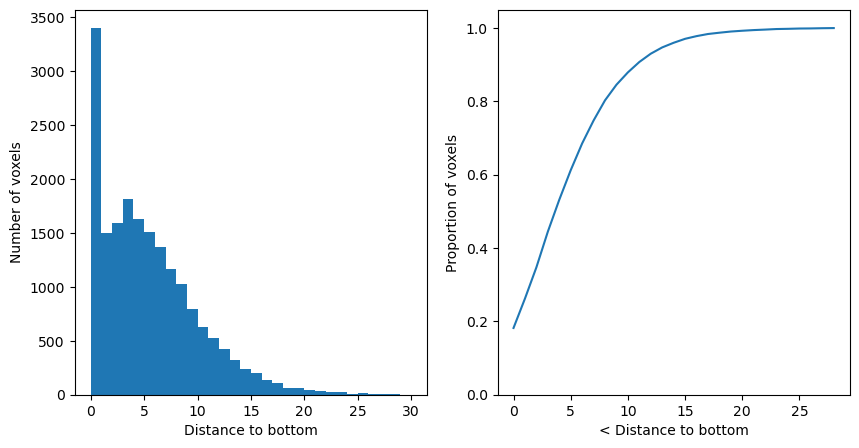

In [179]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5))
data = axs[0].hist(arr2.flatten(), bins=range(int(np.nanmax(arr2)+1)))
axs[0].set_xlabel('Distance to bottom')
axs[0].set_ylabel('Number of voxels')

data = data[0]
integral = [np.sum(data[:k])/np.sum(data) for k in range(1, len(data))]
axs[1].plot(integral)
axs[1].set_ylim([0,1.05])
axs[1].set_xlabel('< Distance to bottom')
axs[1].set_ylabel('Proportion of voxels')
plt.show()

In [ ]:
# DO GRID SEARCH BETWEEN 0 AND 6-8 ? JUST MAKE SURE THAT 0 REMOVES NOTHING, SO <=

In [ ]:
np.nanmax(arr2)

In [112]:
threshold=1 #n_voxels
print(np.sum(arr1>0))
print(np.sum(arr2 > threshold))

18791
15265


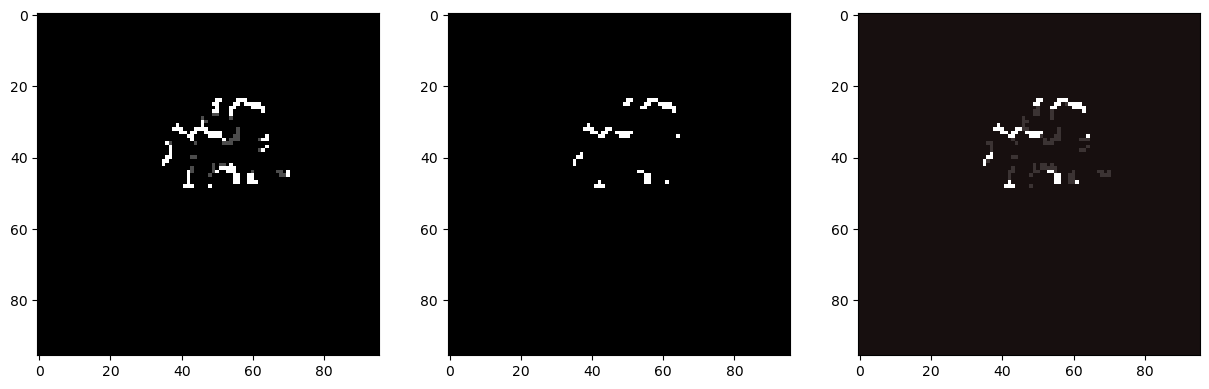

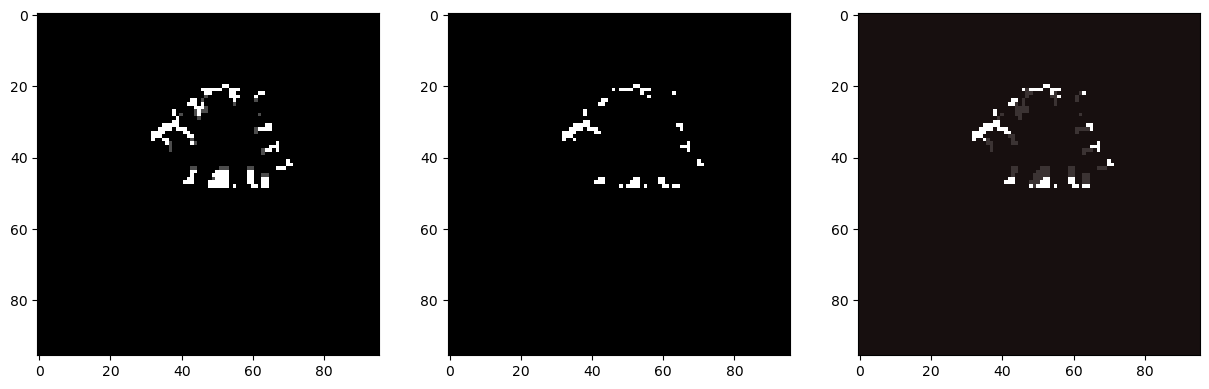

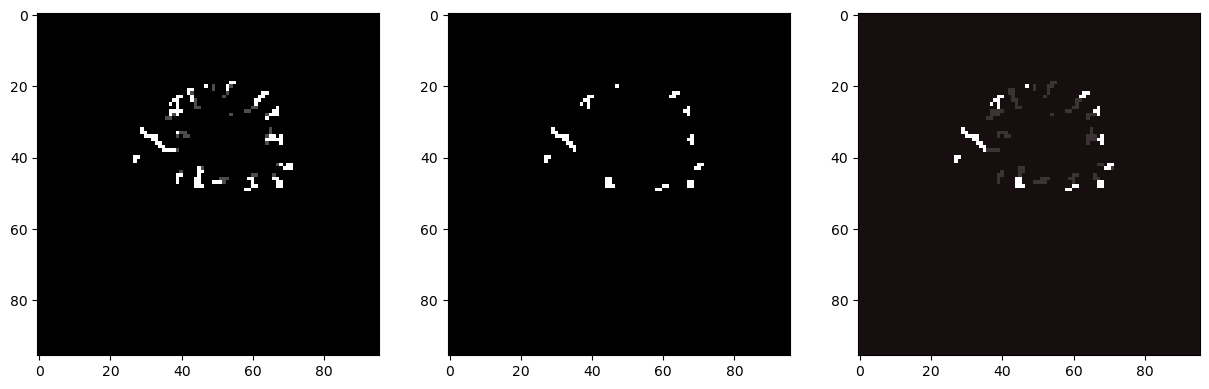

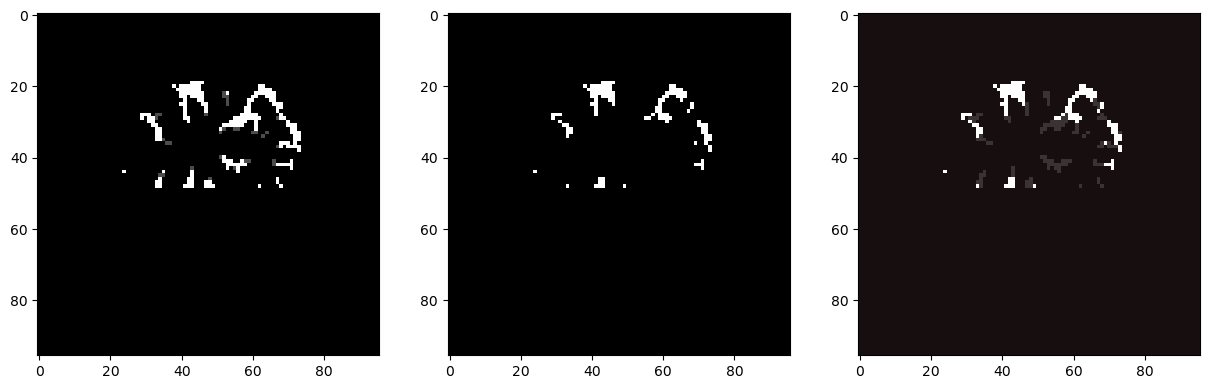

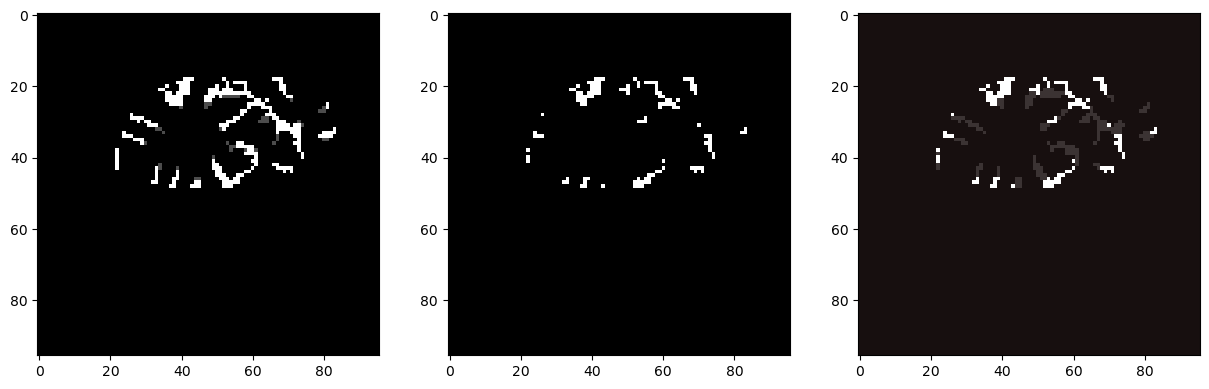

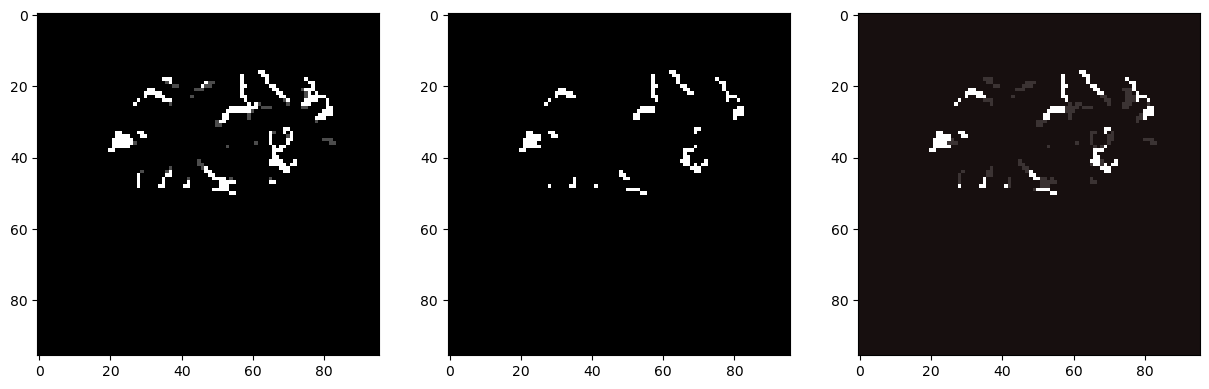

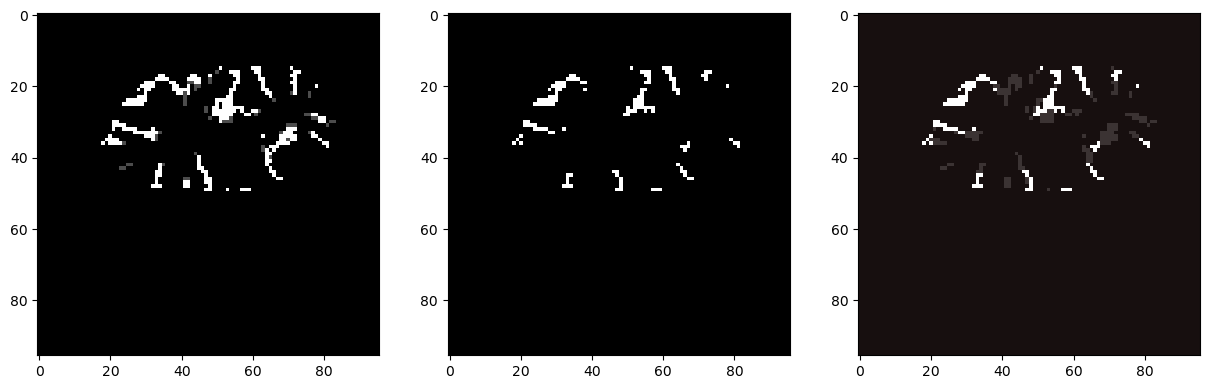

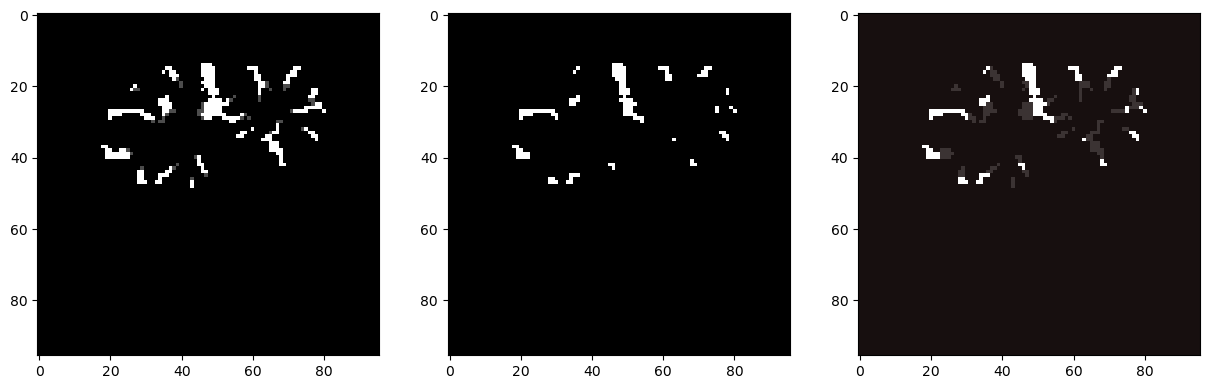

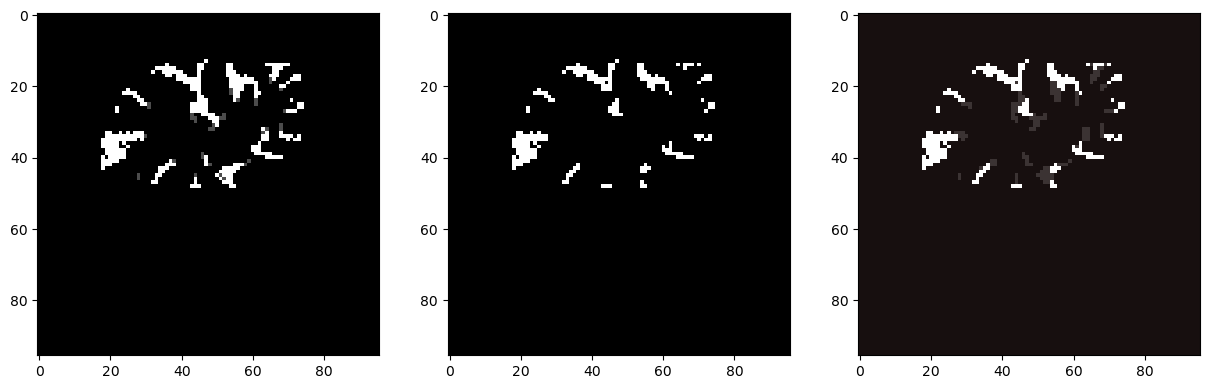

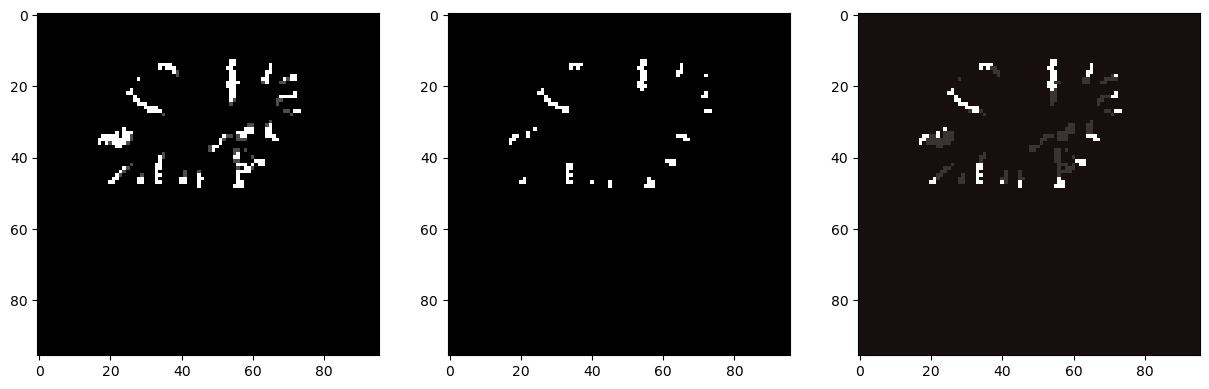

In [107]:
for index in range(20, 70, 5):
    pos=(slice(None), index, slice(None), 0)
    fig,axs = plt.subplots(ncols=3, figsize=(15,5))
    axs[0].imshow(arr1[pos], cmap='gray')
    axs[1].imshow(arr2[pos]>threshold, cmap='gray')
    axs[2].imshow(arr1[pos]>0, cmap='gray', alpha=0.7)
    axs[2].imshow(arr2[pos]>threshold, cmap='hot', alpha=0.8)
plt.show()


In [28]:
np.unique(arr2)

array([0.0000000e+00, 1.1547005e+00, 1.3333334e+00, ..., 2.9576113e+01,
       3.0835085e+01, 3.4028235e+38], dtype=float32)